In [ ]:
from google.colab import files

In [ ]:
!pip install -q kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset

100% 1.32G/1.33G [00:09<00:00, 171MB/s]
100% 1.33G/1.33G [00:09<00:00, 146MB/s]


In [ ]:
!unzip celeba-dataset.zip -d data/celeba

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
attributes = pd.read_csv('./data/celeba/list_attr_celeba.csv')
attributes.head()
categories = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips',
                  'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby',
                  'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
                  'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose',
                  'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
                  'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']

# Print data statistics
stat = round(attributes[categories].describe(), 2)

In [ ]:
stat

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00
mean,-0.78,-0.47,0.03,-0.59,-0.96,-0.70,-0.52,-0.53,-0.52,-0.70,-0.90,-0.59,-0.72,-0.88,-0.91,-0.87,-0.87,-0.92,-0.23,-0.09,-0.17,-0.03,-0.92,-0.77,0.67,-0.43,-0.91,-0.45,-0.84,-0.87,-0.89,-0.04,-0.58,-0.36,-0.62,-0.90,-0.06,-0.75,-0.85,0.55
std,0.63,0.88,1.00,0.81,0.30,0.72,0.86,0.85,0.85,0.71,0.44,0.81,0.70,0.47,0.42,0.49,0.49,0.40,0.97,1.00,0.99,1.00,0.40,0.64,0.74,0.90,0.41,0.90,0.54,0.50,0.46,1.00,0.81,0.93,0.78,0.43,1.00,0.66,0.52,0.84
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00
50%,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00
75%,-1.00,1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,1.00,1.00,1.00,-1.00,-1.00,1.00,1.00,-1.00,1.00,-1.00,-1.00,-1.00,1.00,-1.00,1.00,-1.00,-1.00,1.00,-1.00,-1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


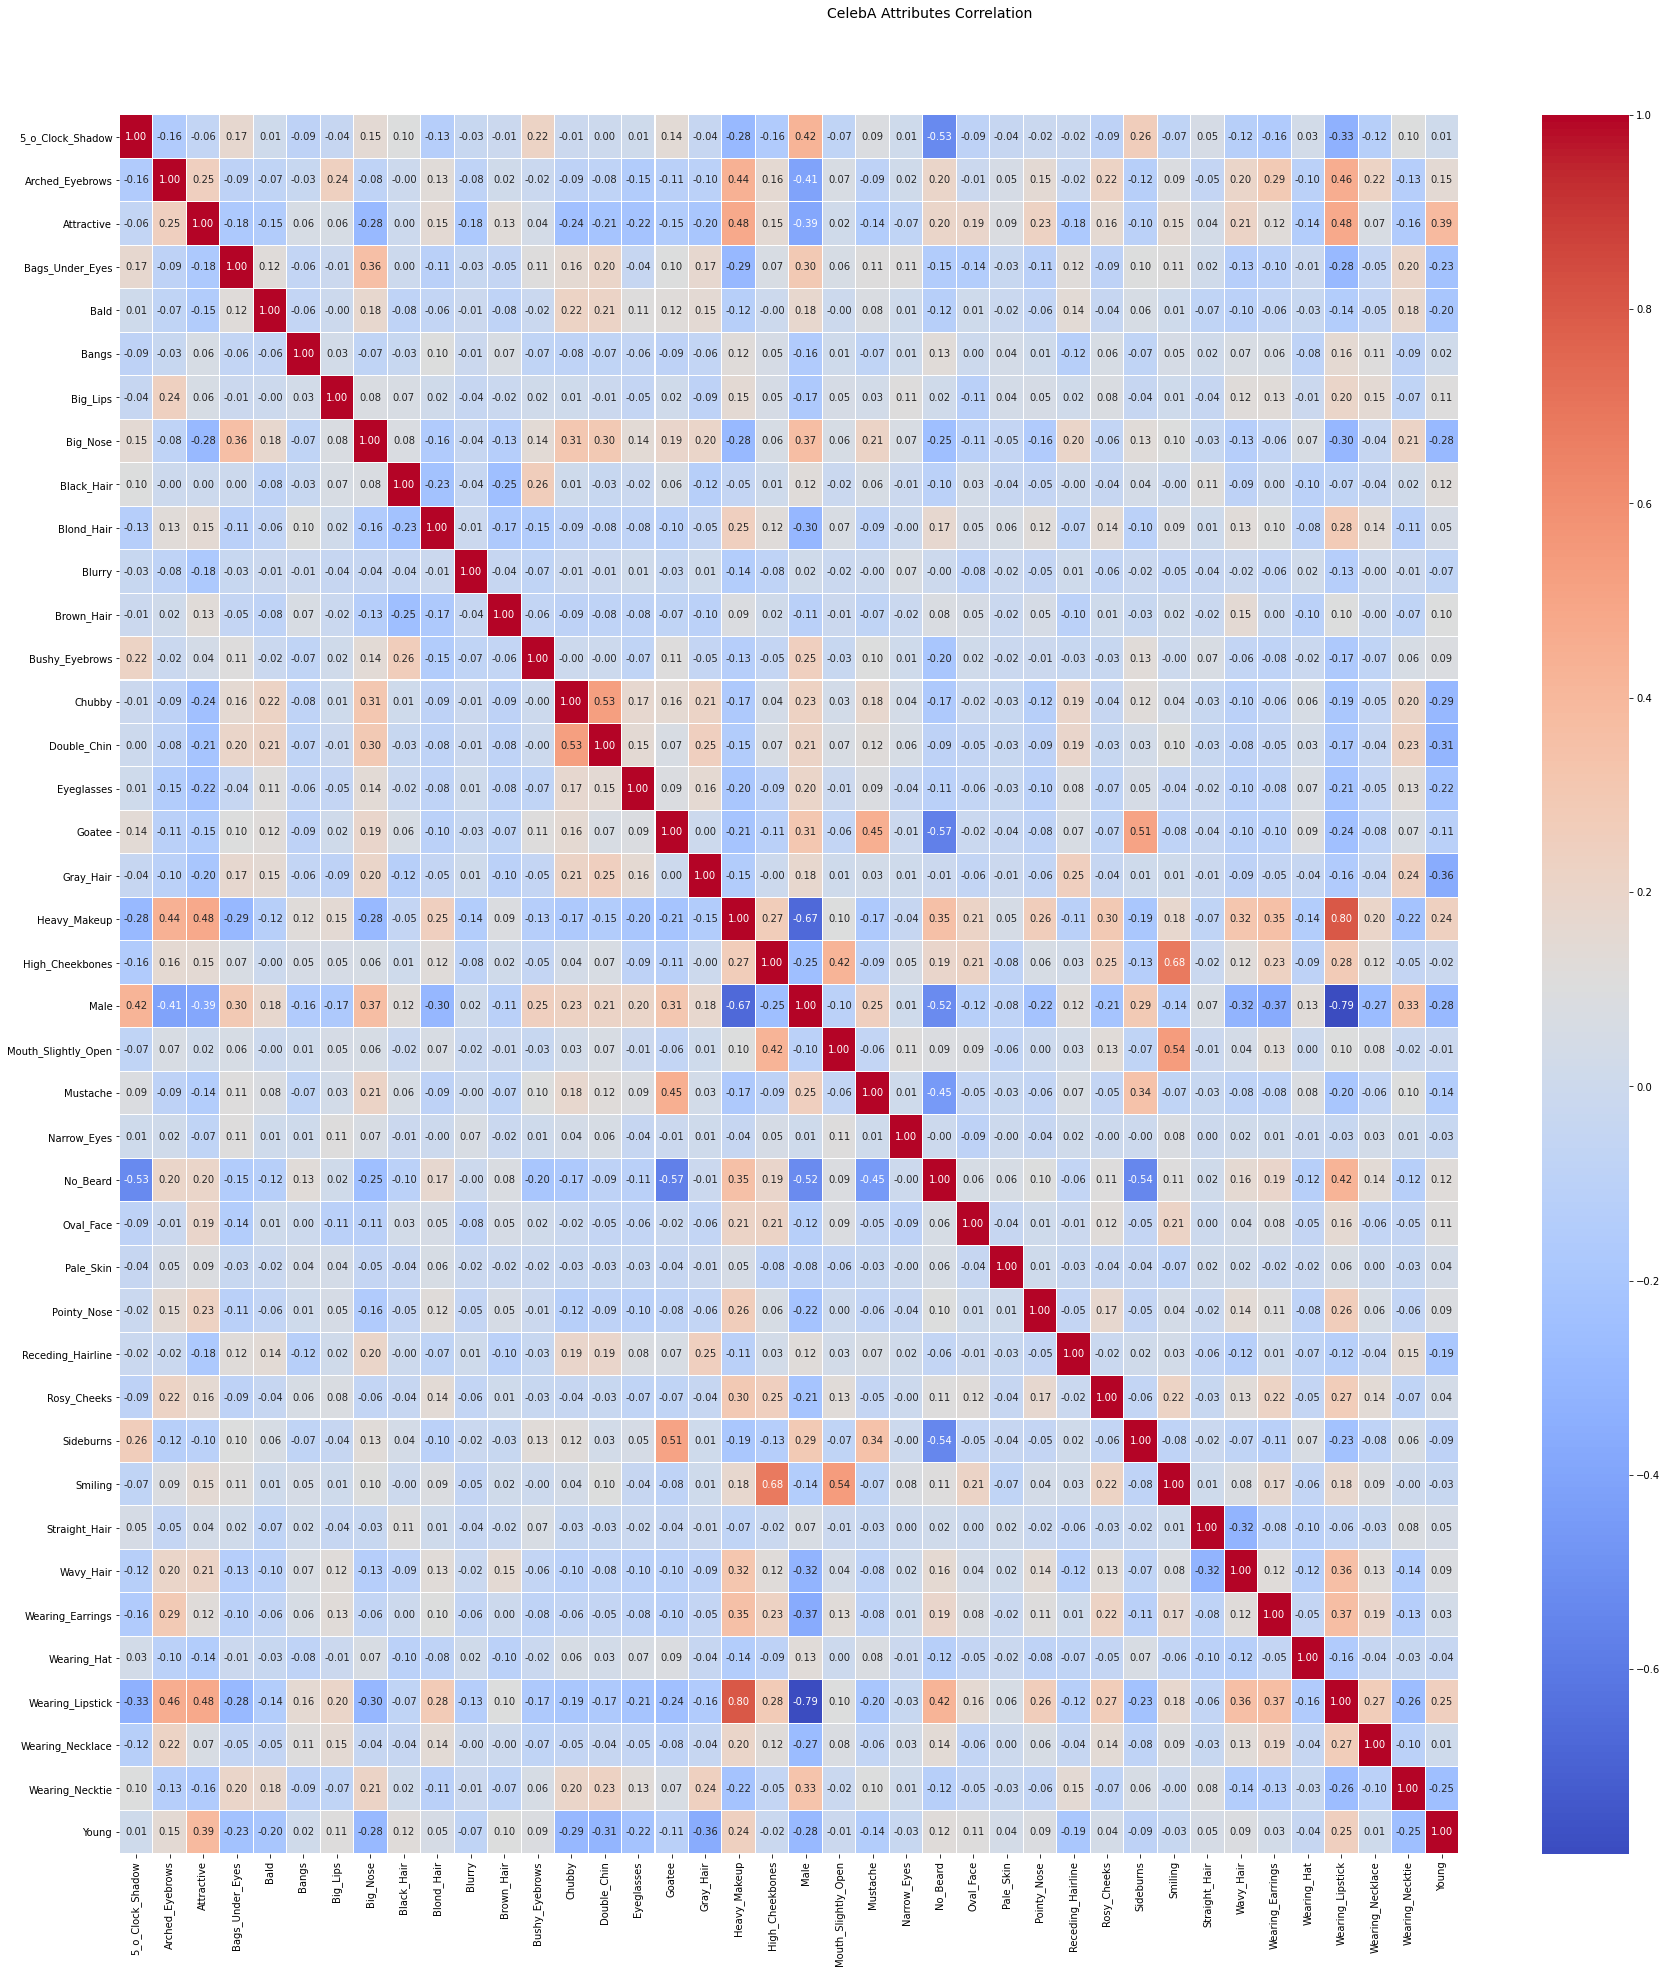

In [ ]:
# Print correlation matrix
f, ax = plt.subplots(figsize=(30, 30))
correlation = attributes.corr()
heatmap = sns.heatmap(round(correlation, 2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.07)
f.subplots_adjust(top=0.93)
t = f.suptitle('CelebA Attributes Correlation', fontsize=14)

In [ ]:
## Drop highly correlated features
# Create correlation matrix with absolute values
corr_abs = correlation.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
# Find indexes of features having correlation greater than 0.50
to_drop = [column for column in upper.columns if any(upper[column] > 0.50)]
# Drop selected features
res = attributes.drop(attributes[to_drop], axis=1)
# extracted_features = [column for column in upper.columns if any(upper[column] <= 0.50)]

In [ ]:
# Dropped features
to_drop

['Double_Chin', 'Male', 'No_Beard', 'Sideburns', 'Smiling', 'Wearing_Lipstick']

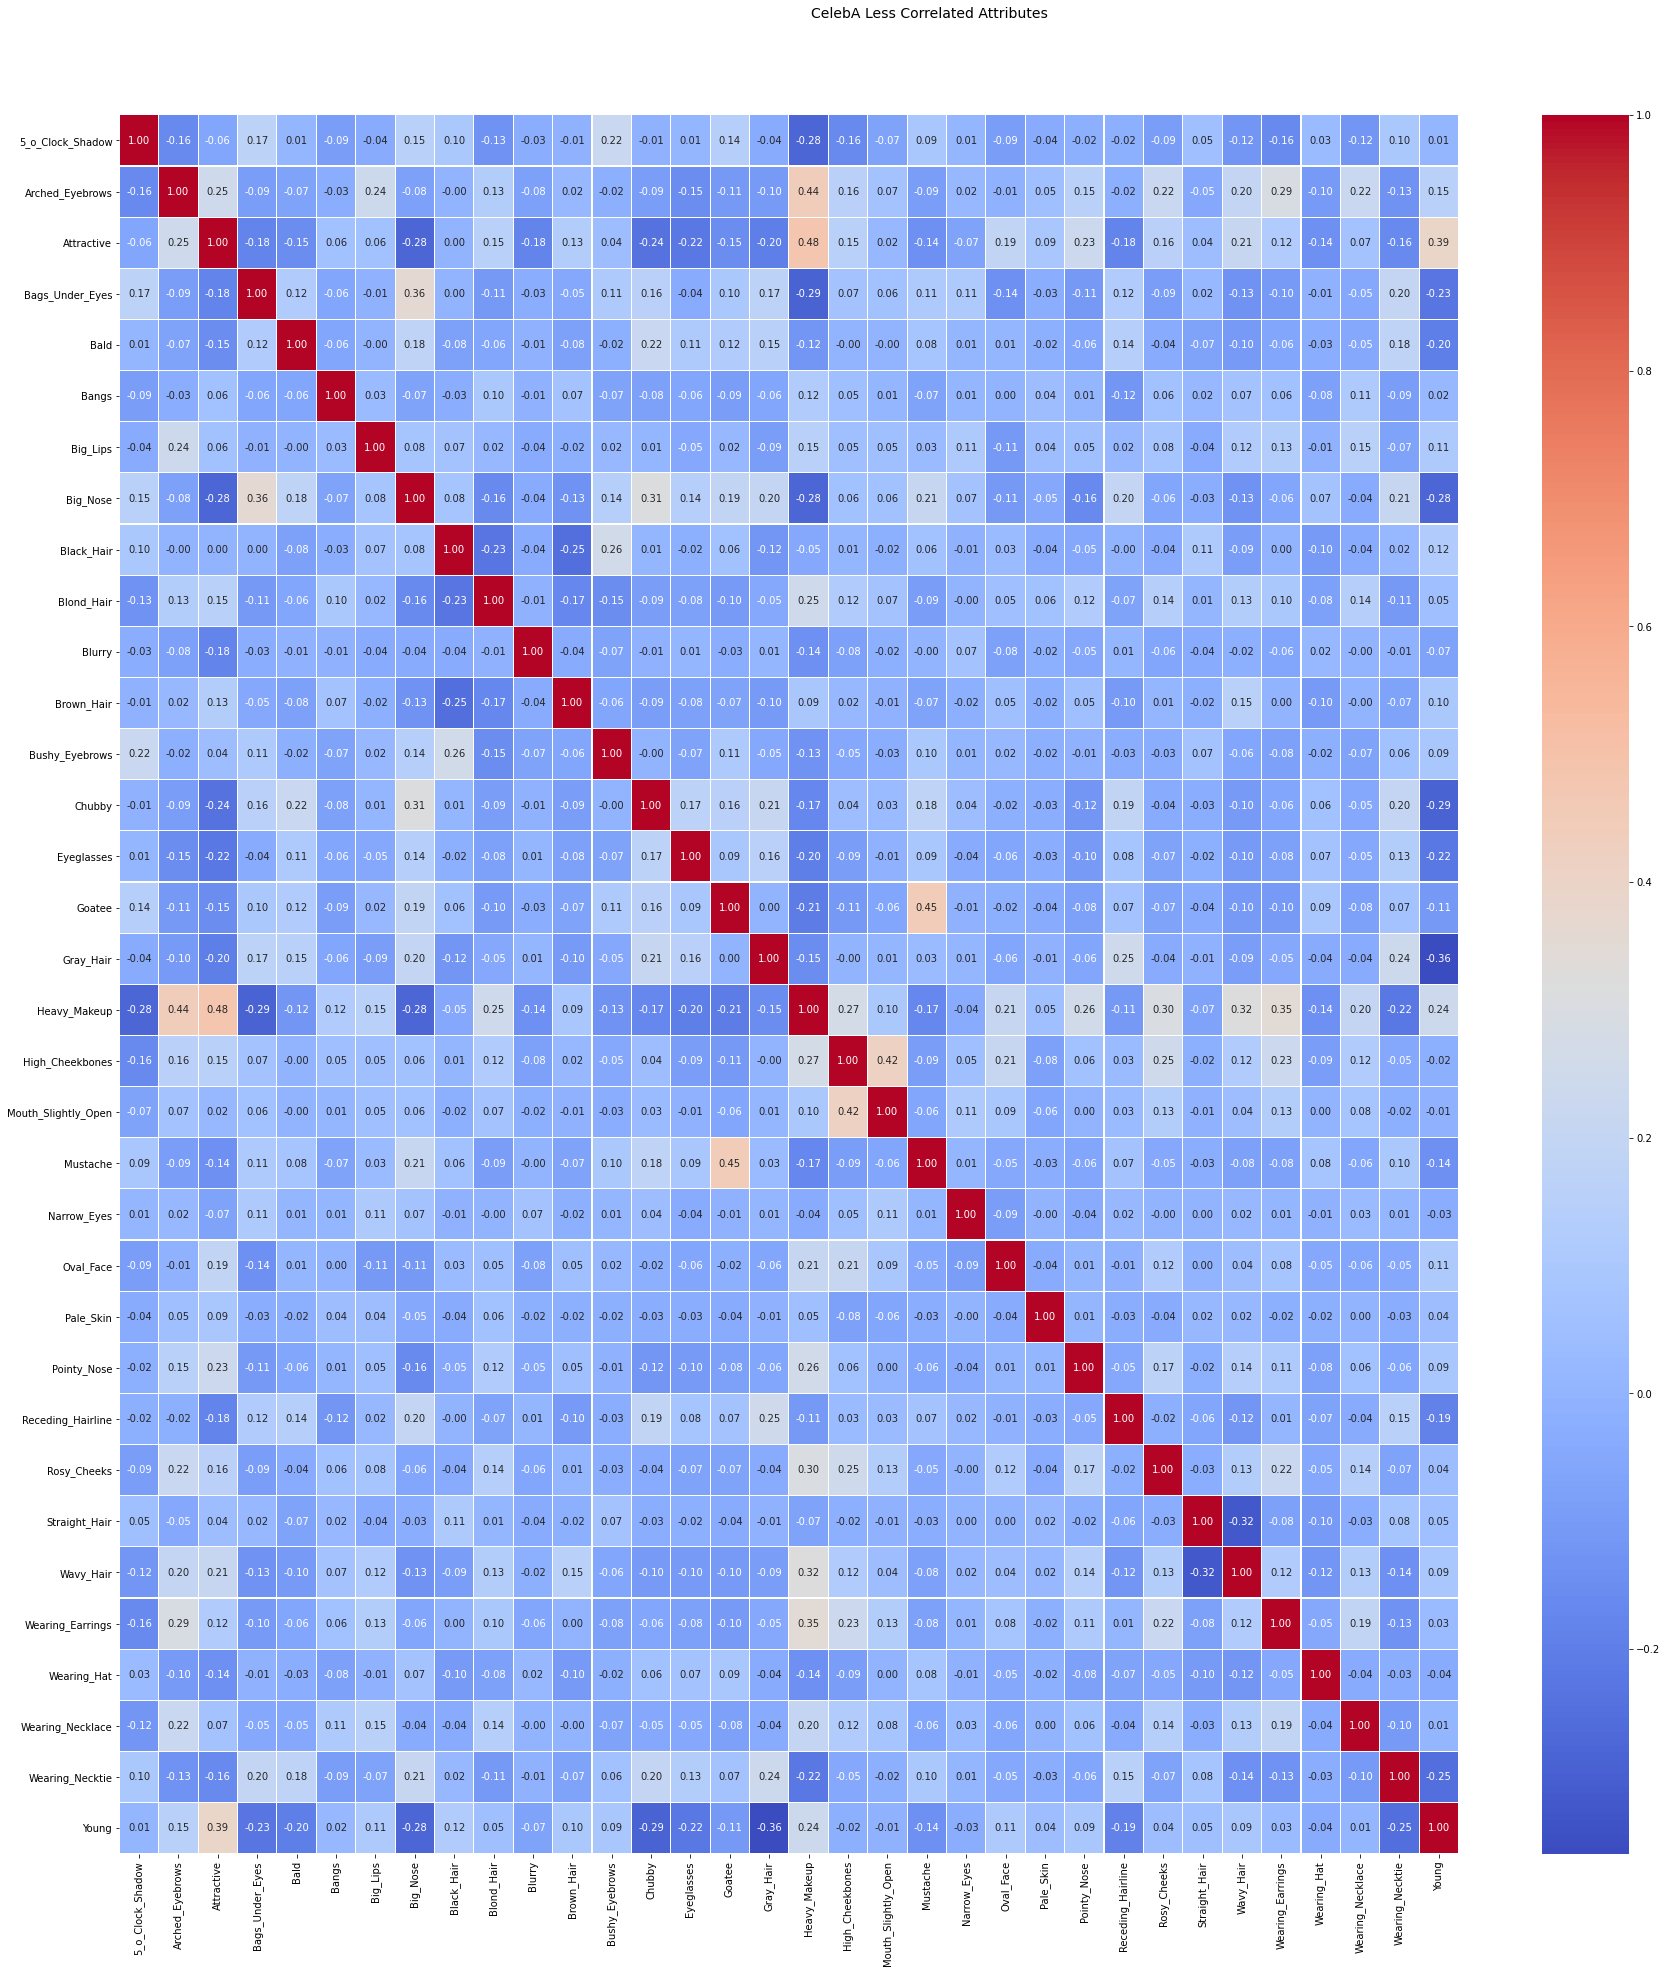

In [ ]:
# Print new correlation matrix with remaining attributes
f, ax = plt.subplots(figsize=(30, 30))
final_corr = res.corr()
heatmap = sns.heatmap(round(final_corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.07)
f.subplots_adjust(top=0.93)
t = f.suptitle('CelebA Less Correlated Attributes', fontsize=14)